## ASSICIATION RULE

The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.

**Dataset:**

Use the Online retail dataset to apply the association rules.

**Data Preprocessing:**
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  

**Association Rule Mining:**
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.

**Analysis and Interpretation:**
•	Analyse the generated rules to identify interesting patterns and relationships between the products.
•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


In [ ]:
#!pip install pandas openpyxl (To read .xlsx file we install openpyxl)

In [1]:
import pandas as pd
items = pd.read_excel("Online retail.xlsx", engine="openpyxl")
items.head

<bound method NDFrame.head of      shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0                                burgers,meatballs,eggs                                                                                                                                                                             
1                                               chutney                                                                                                                                                                             
2                                        turkey,avocado                                                                                                                                                                             
3     mineral water,milk,energy bar,whole wheat rice...                                                                                                                                                                             
4                                        low fat yogurt                                                                                                                                                                             
...                                                 ...                                                                                                                                                                             
7495                      butter,light mayo,fresh bread                                                                                                                                                                             
7496  burgers,frozen vegetables,eggs,french fries,ma...                                                                                                                                                                             
7497                                            chicken                                                                                                                                                                             
7498                                 escalope,green tea                                                                                                                                                                             
7499    eggs,frozen smoothie,yogurt cake,low fat yogurt                                                                                                                                                                             

[7500 rows x 1 columns]>

In [3]:
items.shape

(7500, 1)

**Data Preprocessing:**
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format

In [4]:
item_list = [row[0].split(',') for row in items.values]

In [5]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(item_list)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [7]:
data = pd.DataFrame(te_ary, columns=te.columns_)
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.columns

Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=120)

In [9]:
data.shape

(7500, 120)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Columns: 120 entries,  asparagus to zucchini
dtypes: bool(120)
memory usage: 879.0 KB


In [12]:
data.isnull().sum()

,0
asparagus,0
almonds,0
antioxydant juice,0
asparagus,0
avocado,0
...,...
whole wheat pasta,0
whole wheat rice,0
yams,0
yogurt cake,0


In [13]:
#data.datatypes(boolean)
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7495,False
7496,False
7497,True
7498,True


In [14]:
# presents of duplicates so dropping them
df = data.drop_duplicates()

In [15]:
df.shape

(5153, 120)

In [16]:
#cleaned data and converted into required format
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Association Rule Mining:**

• Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc. • Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together. • Set appropriate threshold for support, confidence and lift to extract meaning full rules. Analysis and Interpretation: • Analyse the generated rules to identify interesting patterns and relationships between the products. • Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.

In [17]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.029303,(almonds)
1,0.045993,(avocado)
2,0.020571,(black tea)
3,0.045216,(brownies)
4,0.114302,(burgers)
...,...,...
168,0.020376,"(spaghetti, whole wheat rice)"
169,0.022899,"(mineral water, spaghetti, chocolate)"
170,0.020765,"(mineral water, eggs, spaghetti)"
171,0.024840,"(mineral water, ground beef, spaghetti)"


In [18]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [19]:
frequent_itemsets

,support,itemsets,length
0,0.029303,(almonds),1
1,0.045993,(avocado),1
2,0.020571,(black tea),1
3,0.045216,(brownies),1
4,0.114302,(burgers),1
...,...,...,...
168,0.020376,"(spaghetti, whole wheat rice)",2
169,0.022899,"(mineral water, spaghetti, chocolate)",3
170,0.020765,"(mineral water, eggs, spaghetti)",3
171,0.024840,"(mineral water, ground beef, spaghetti)",3


In [20]:
from mlxtend.frequent_patterns import association_rules
# Step 4: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [21]:
rel_rules = rules[rules.lift>1.2]
rel_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(burgers),(eggs),0.114302,0.208034,0.036290,0.317487,1.526130,1.0,0.012511,1.160368,0.389239,0.126866,0.138204,0.245964
2,(burgers),(french fries),0.114302,0.192897,0.029497,0.258065,1.337833,1.0,0.007449,1.087834,0.285112,0.106219,0.080742,0.205491
3,(burgers),(green tea),0.114302,0.168834,0.025034,0.219015,1.297225,1.0,0.005736,1.064254,0.258693,0.096992,0.060375,0.183646
4,(burgers),(milk),0.114302,0.170386,0.025616,0.224109,1.315298,1.0,0.006141,1.069240,0.270652,0.098876,0.064756,0.187225
7,(cake),(eggs),0.103629,0.208034,0.026781,0.258427,1.242233,1.0,0.005222,1.067954,0.217542,0.094005,0.063630,0.193579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,"(mineral water, spaghetti)",(ground beef),0.085193,0.136425,0.024840,0.291572,2.137225,1.0,0.013217,1.219001,0.581657,0.126233,0.179656,0.236824
119,"(ground beef, spaghetti)",(mineral water),0.056084,0.299825,0.024840,0.442907,1.477215,1.0,0.008025,1.256835,0.342245,0.075029,0.204351,0.262877
120,"(mineral water, spaghetti)",(milk),0.085193,0.170386,0.022705,0.266515,1.564181,1.0,0.008189,1.131057,0.394277,0.097500,0.115872,0.199886
121,"(mineral water, milk)",(spaghetti),0.067922,0.230157,0.022705,0.334286,1.452424,1.0,0.007073,1.156416,0.334195,0.082452,0.135259,0.216468


In [22]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(chocolate),0.114302,0.203765,0.024646,0.215620,1.058179,1.0,0.001355,1.015114,0.062076,0.083995,0.014889,0.168286
1,(burgers),(eggs),0.114302,0.208034,0.036290,0.317487,1.526130,1.0,0.012511,1.160368,0.389239,0.126866,0.138204,0.245964
2,(burgers),(french fries),0.114302,0.192897,0.029497,0.258065,1.337833,1.0,0.007449,1.087834,0.285112,0.106219,0.080742,0.205491
3,(burgers),(green tea),0.114302,0.168834,0.025034,0.219015,1.297225,1.0,0.005736,1.064254,0.258693,0.096992,0.060375,0.183646
4,(burgers),(milk),0.114302,0.170386,0.025616,0.224109,1.315298,1.0,0.006141,1.069240,0.270652,0.098876,0.064756,0.187225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,"(mineral water, spaghetti)",(ground beef),0.085193,0.136425,0.024840,0.291572,2.137225,1.0,0.013217,1.219001,0.581657,0.126233,0.179656,0.236824
119,"(ground beef, spaghetti)",(mineral water),0.056084,0.299825,0.024840,0.442907,1.477215,1.0,0.008025,1.256835,0.342245,0.075029,0.204351,0.262877
120,"(mineral water, spaghetti)",(milk),0.085193,0.170386,0.022705,0.266515,1.564181,1.0,0.008189,1.131057,0.394277,0.097500,0.115872,0.199886
121,"(mineral water, milk)",(spaghetti),0.067922,0.230157,0.022705,0.334286,1.452424,1.0,0.007073,1.156416,0.334195,0.082452,0.135259,0.216468


In [23]:
rel_rules = rules[rules.lift>1.2]
rel_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(burgers),(eggs),0.114302,0.208034,0.036290,0.317487,1.526130,1.0,0.012511,1.160368,0.389239,0.126866,0.138204,0.245964
2,(burgers),(french fries),0.114302,0.192897,0.029497,0.258065,1.337833,1.0,0.007449,1.087834,0.285112,0.106219,0.080742,0.205491
3,(burgers),(green tea),0.114302,0.168834,0.025034,0.219015,1.297225,1.0,0.005736,1.064254,0.258693,0.096992,0.060375,0.183646
4,(burgers),(milk),0.114302,0.170386,0.025616,0.224109,1.315298,1.0,0.006141,1.069240,0.270652,0.098876,0.064756,0.187225
7,(cake),(eggs),0.103629,0.208034,0.026781,0.258427,1.242233,1.0,0.005222,1.067954,0.217542,0.094005,0.063630,0.193579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,"(mineral water, spaghetti)",(ground beef),0.085193,0.136425,0.024840,0.291572,2.137225,1.0,0.013217,1.219001,0.581657,0.126233,0.179656,0.236824
119,"(ground beef, spaghetti)",(mineral water),0.056084,0.299825,0.024840,0.442907,1.477215,1.0,0.008025,1.256835,0.342245,0.075029,0.204351,0.262877
120,"(mineral water, spaghetti)",(milk),0.085193,0.170386,0.022705,0.266515,1.564181,1.0,0.008189,1.131057,0.394277,0.097500,0.115872,0.199886
121,"(mineral water, milk)",(spaghetti),0.067922,0.230157,0.022705,0.334286,1.452424,1.0,0.007073,1.156416,0.334195,0.082452,0.135259,0.216468


In [24]:
rel_rules.iloc[:,[0,1]]

,antecedents,consequents
1,(burgers),(eggs)
2,(burgers),(french fries)
3,(burgers),(green tea)
4,(burgers),(milk)
7,(cake),(eggs)
...,...,...
118,"(mineral water, spaghetti)",(ground beef)
119,"(ground beef, spaghetti)",(mineral water)
120,"(mineral water, spaghetti)",(milk)
121,"(mineral water, milk)",(spaghetti)


<Axes: xlabel='support', ylabel='confidence'>

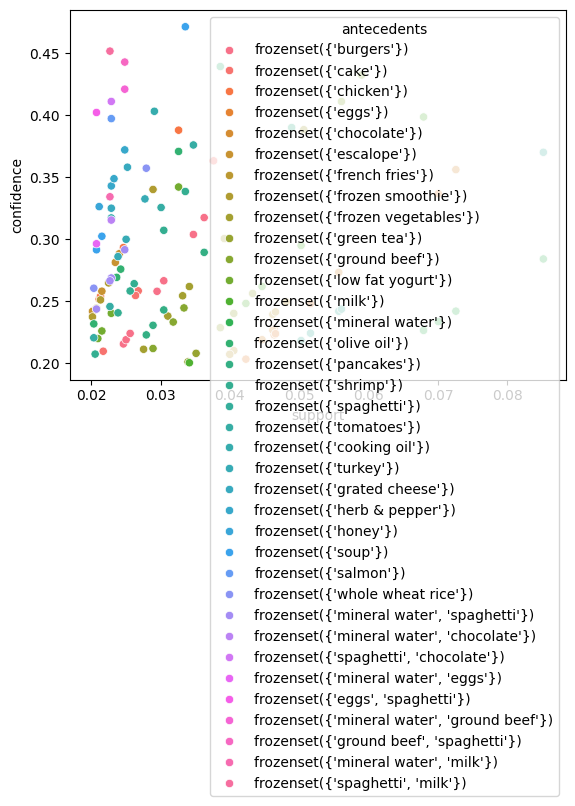

In [25]:
import seaborn as sns
sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')